In [1]:
#Import the standard pylab libraries, matplotlib.pyplot as plt , numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# The Topology of (Deep) Neural Networks

In this exercise you will have to read and implement parts of the blog post by [Chris Olah](https://ai.google/research/people/ChristopherOlah) on the topology of neural networks.

The first step will require you to read the blog post [here](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/).  
We have prepared a similar dataset to the one that Chris uses in his first example (the two cosines-dataset) and you may should use the provided functions to generate a dataset for you.

You will then be required to perform the following tasks:

- Read Chris's Blog Post [link](http://colah.github.io/posts/2014-03-NN-Manifolds)
- Implement a Neural Network that allows you to visualize the topology of the hidden layers in Pytorch
    - Specifically plot the layer activations in a 2D-graph showing the decision boundary and the transformed input data. Here is an example of what such a plot could look like. Note that this is for the input space of the neural network: ![Network Classification](figure1.png)
        Here's a few steps that you may want to make sure you've implemented along the way.  
        You may use all of Pytorch's functionality as you wish:
            - A method to make your experiment reproducible, setting the random seeds
            - A Pytorch Neural Network with Linear Layers and an appropriate activation function
            - An objective function to perform the classification task used to train the network
            - Creating a set of dataloaders to handle your data during training and evaluation
            - A train method: to perform a single epoch of training given a model and an optimizer
            - An evaluation method: to perform evaluation on a dataset without the need to compute gradients
            - A plotting routine to highlight to obtain the visualizations of the activation values
- Create an animation of the evolution of the underlying activations as a function of training iterations
    - As an example this could be done by creating a GIF where each image in the GIF corresponds to the output plots for the current epoch of training
- Use comments as much as you can throughout the provided jupyter notebook to document your thought and creation process
- Answer the following questions (use graphs where appropriate to support your findings):
    - Describe in your own words the "Mannifold Hypothesis"
    - For the given two-sinusoids dataset how many hidden-layers do we theoretically need to classify the data?
    - How many neurons should such layer(s) have at least? Why?
    - What do you think the impact will be for large high-dimensional datasets such as images?
- Try this approach with more layers and other datasets, produce one additional graph of such an experimentation.

## Generating the dataset

The following functions are a reference implementation of a function that is similar to the one presented in Chris Olah's blog post.  
Two sinusoids stacked on top of each other, not linear seperable in the x-y plane.  
I also provide a method to create a mesh of grid points.  

In [2]:
def make_dataset(n_points, squash=2.5, spacing=0.3):
    x = np.linspace(-1, 1, n_points) #Define a x-axis values and number of points
    r = x*np.pi #convert this to a radial representation
    
    upper = np.sin(r-np.pi/2.)/squash+spacing #upper curve
    lower = np.sin(r-np.pi/2.)/squash-spacing #lower curve
    
    y_coords = np.hstack([upper, lower]) #stack the y-coordinates for each curve
    x_coords = np.hstack([x, x]) #stack the x-coordinates twice
    
    coordinates = np.vstack([x_coords, y_coords]).T #create a single set of coordinates for both curves
    
    labels = np.ones((2*n_points, 1)) #create a set of labels, first half = 1
    labels[n_points:] = 0
    
    return x, upper, lower, coordinates, labels

def make_grid(n_points):
    x = np.linspace(-1, 1, n_points) #Define a x-axis values and number of points
    g = np.meshgrid(x, x) #Create a mesh of points from the x-values
    grid_locations = np.vstack(map(np.ravel, g)).T #Turn into a set of pairs of points
    return grid_locations

n_train, n_test = 100, 100
x_coords_train, upper_coords_train, lower_coords_train, X_train, y_train = make_dataset(n_train)
grid_locations = make_grid(n_test)

/home/lm715/anaconda2/envs/dlenv/lib/python3.6/site-packages/ipykernel/__main__.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


## Plotting the dataset

Let's just plot the data first to see what this looks like.

(-1, 1)

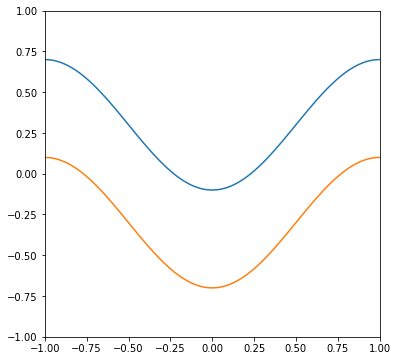

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x_coords_train, upper_coords_train)
ax.plot(x_coords_train, lower_coords_train)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

## Defining the neural network

We create a multi-layer neural network where each layer has 2 units.  
This allows us to simply obtain a the activations at each layer e.g. $a_1=\tanh{(W_1X+b_1)}$.  
For each forward pass we will return the final output as well as the pre-activation values $z_i$ and activations $a_i$.  
Since we use ```nn.BCEWithLogitsLoss()``` we do not need a sigmoid activation on the output.  
The final layer outputs correspond to the logits.

In [4]:
import torch #import torch to create Tensors
import torch.nn as nn #import all of pytorch's neural network functions
from torch.optim import SGD #we'll use SGD as an optimizer
from torch.utils.data import TensorDataset, DataLoader #some simple handlers for datasets as Tensors
import torch.nn.functional as F #Also make use of the functional utility of torch.nn

from tqdm import tqdm_notebook as tqdm #Just a fancy progress bar

class OlahNet(nn.Module): #We define this neural network as a nn.Module
    def __init__(self):
        """
        A neural network where every layer has two units i.e. two weights that we can visualize
        We don't visualize the biases here because we only plot the post-activation values 
        these will be in a range of -1, 1 due to the hyperbolic activation function.
        """
        super(OlahNet, self).__init__() #Need to initialise our nn.Module and all its parent objects
        
        #Define a few layers, this problem needs at least one layer with 2 units
        #This network has 2 layers - one hidden and one output layer
        #Hidden Layer 1
        #Output Layer
        #Activation function
        
    def forward(self, x):
        
        #Forward pass through hidden layer 1
        z1 = self.layer1(x) #Affine Transformation W_1*x+b_1
        a1 = self.activation(z1) #Activation function applied to z_1
        
        #Forward pass through output layer
        logits = self.logits(a1) #Compute the logits W_2*a_1+b_2
        return logits, a1 #Returns logits, activations hidden layer 1

In [5]:
def train(model, loader, optimizer):
    """
    Training iteration across one epoch
    """
    #Set the model to 'train' mode
    #Define a criterion in this case the binary-cross-entropy with logits
    
    #running variable for the total loss
    #iterate over the batches in our training data
        #Forward Pass the inputs
        #compute the BCE loss
        #set out all the gradients to zero in the neural net
        #compute the backward pass
        #make a gradient descent step
        #add the current batchwise loss to the running loss over one epoch
    return epoch_loss/len(loader.dataset) #return the average loss per dataset element

def evaluate(model, X):
    """
    Evaluation function for the network provided a Tensor object
    """
    #Set our network to evaluation mode
    with torch.no_grad(): #Specify that we don't need any gradients be computed i.e. make inference fast
        #Forward pass our Tensor
    return logits, a1 #Return the logits and activation values

def fit_model(model, loader, epochs=100):
    """
    Fit our neural network (model) to the training data provided (loader)
    """
    #Instantiate a SGD optimizer
    #Store the losses in a list
    for epoch in tqdm(range(epochs)): #Fancy progress bar over the number of epochs
        
        #Perform one training iteration
        #Store the loss for this epoch
        
    return losses #return the list of losses

## Set the seeds, instantiate and train the network

In [6]:
set_seed(42) #Setting the seed to the only "true" seed
model = OlahNet() #Instantiate our neural network

train_dataset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train)) #Create a pytorch TensorDataset
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=32) #Create a dataloader that handles batching

losses = fit_model(model, train_loader, epochs=50) #Fit our model for 50 epochs i.e. full passes through data

#evaluate our model on the training data
logits_train, a1_train = evaluate(model, torch.Tensor(X_train))

#evaluate our model on the grid locations
logits_grid, a1_grid = evaluate(model, torch.Tensor(grid_locations))

## Plot the outputs of the intermediate activations of hidden layer 1

## Creating an animation of the learning process and the intermediate activations